In [2]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
reviews=pd.read_csv('amazon_alexa.tsv', sep='\t')

In [5]:
data = reviews.copy()

In [6]:
data.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
data.shape

(3150, 5)

In [8]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [9]:
data = data.drop_duplicates()

data.duplicated().sum()

0

In [10]:
data.shape

(2435, 5)

In [11]:
print(data.columns.tolist())

['rating', 'date', 'variation', 'verified_reviews', 'feedback']


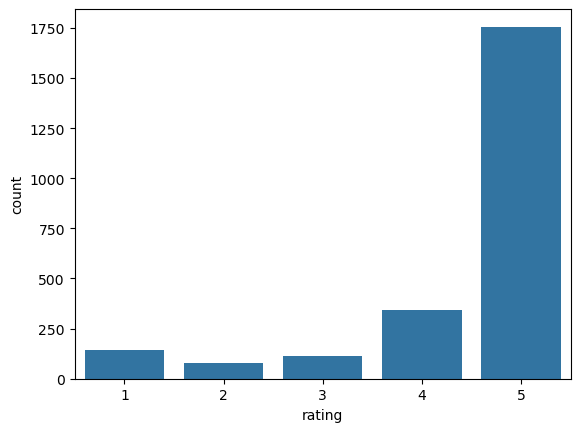

In [12]:
sns.countplot(data=data, x="rating");

In [13]:
data['rating'].value_counts(normalize=True)

rating
5    0.721150
4    0.141684
1    0.057906
3    0.046407
2    0.032854
Name: proportion, dtype: float64

In [14]:
data['rating'].value_counts()

rating
5    1756
4     345
1     141
3     113
2      80
Name: count, dtype: int64

In [16]:
data['feedback'].value_counts(normalize=True)

feedback
1    0.90924
0    0.09076
Name: proportion, dtype: float64

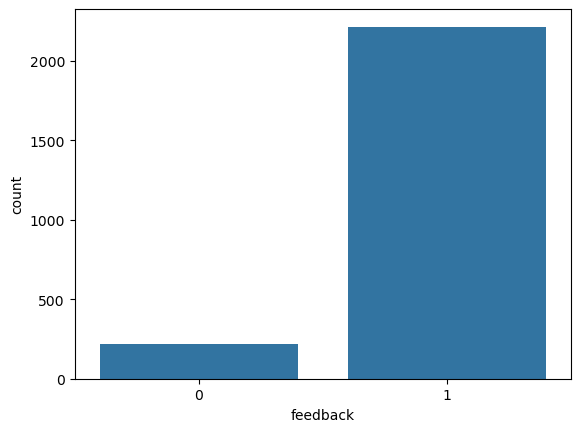

In [13]:
sns.countplot(data=data, x="feedback");

In [14]:
data['feedback'].value_counts(normalize=True)

feedback
1    0.90924
0    0.09076
Name: proportion, dtype: float64

In [17]:
print(f"Variation Count: \n {data['variation'].value_counts()}")

Variation Count: 
 variation
Configuration: Fire TV Stick    342
Black  Plus                     270
Black                           261
Black  Show                     260
Black  Dot                      252
Black  Spot                     241
Charcoal Fabric                 219
White  Spot                     108
White  Dot                       92
White                            91
White  Show                      85
Heather Gray Fabric              79
White  Plus                      78
Sandstone Fabric                 45
Oak Finish                        7
Walnut Finish                     5
Name: count, dtype: int64


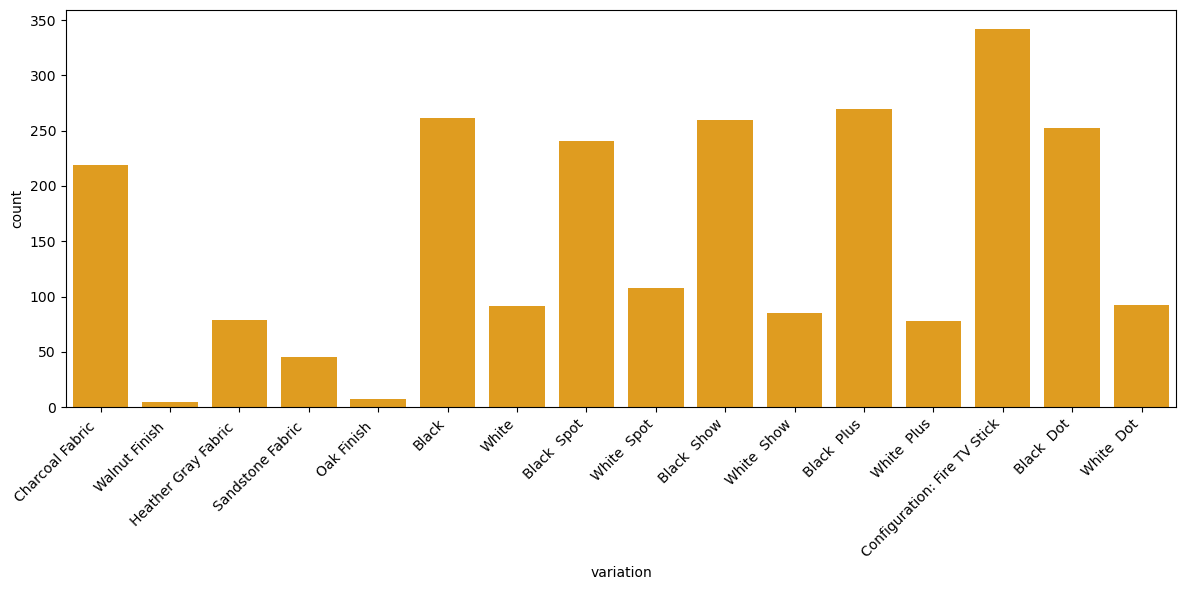

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="variation",color="orange")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [15]:
import re

def remove_special_characters(text):
    if not isinstance(text, str) or text.strip() == "":
        return ""
    pattern = r'[^A-Za-z0-9]+'        
    new_text = re.sub(pattern, ' ', text)  
    new_text = new_text.strip()        
    
    return new_text

In [16]:
data['cleaned_text'] = data['verified_reviews'].apply(remove_special_characters)

In [17]:
data.loc[0:3, ['verified_reviews','cleaned_text']]

,verified_reviews,cleaned_text
0,Love my Echo!,Love my Echo
1,Loved it!,Loved it
2,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",Sometimes while playing a game you can answer a question correctly but Alexa says you got it wrong and answers the same as you I like being able to turn lights on and off while away from home
3,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",I have had a lot of fun with this thing My 4 yr old learns about dinosaurs i control the lights and play games like categories Has nice sound when playing music as well


In [18]:
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [19]:
data.loc[0:3, ['verified_reviews','cleaned_text']]

,verified_reviews,cleaned_text
0,Love my Echo!,love my echo
1,Loved it!,loved it
2,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home
3,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well


In [20]:
data['cleaned_text'] = data['cleaned_text'].str.strip()

In [21]:
data.loc[0:3, ['verified_reviews','cleaned_text']]

,verified_reviews,cleaned_text
0,Love my Echo!,love my echo
1,Loved it!,loved it
2,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home
3,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well


In [22]:
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [23]:
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [24]:
data.loc[0:3,['cleaned_text','cleaned_text_without_stopwords']]

,cleaned_text,cleaned_text_without_stopwords
0,love my echo,love echo
1,loved it,loved
2,sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home,sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home
3,i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well,lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well


In [25]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def apply_porter_stemmer(text):
    words = text.split()

    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

In [26]:
data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_porter_stemmer)

In [27]:
data.loc[0:2,['cleaned_text_without_stopwords','final_cleaned_text']]

,cleaned_text_without_stopwords,final_cleaned_text
0,love echo,love echo
1,loved,love
2,sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home,sometim play game answer question correctli alexa say got wrong answer like abl turn light away home


In [28]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def apply_lemmatization(text):
    if not isinstance(text, str) or text.strip() == "":
        return ""
    
    words = text.split()

    new_text = ' '.join([lemmatizer.lemmatize(word) for word in words])
    
    return new_text

data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_lemmatization)

print(data[['cleaned_text_without_stopwords', 'final_cleaned_text']].head())

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mayankkumar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mayankkumar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                                                                    cleaned_text_without_stopwords  \
0                                                                                                        love echo   
1                                                                                                            loved   
2    sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home   
3  lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well   
4                                                                                                            music   

                                                                                           final_cleaned_text  
0                                                                                                   love echo  
1                                                                  

In [29]:
bow_vec = CountVectorizer(max_features = 1000)

# Applying CountVectorizer on data
data_features_BOW = bow_vec.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_BOW.shape)

# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()

Shape of the feature vector (2435, 1000)
first 10 words ['10' '100' '1st' '20' '2nd' '30' '34' '3rd' '99' 'ability']
last 10 words ['worth' 'would' 'wrong' 'yard' 'year' 'yelling' 'yes' 'yet' 'youtube'
 'zigbee']


,10,100,1st,20,2nd,30,34,3rd,99,ability,...,worth,would,wrong,yard,year,yelling,yes,yet,youtube,zigbee
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing tfidf
tfidf = TfidfVectorizer(max_features=1000)

# Applying TfidfVectorizer on data
data_features_tfidf = tfidf.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_tfidf = data_features_tfidf.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_tfidf.shape)

# Getting the 1000 words considered by the BoW model
words = tfidf.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_tfidf = pd.DataFrame(data_features_tfidf, columns=tfidf.get_feature_names_out())
df_tfidf.head()

Shape of the feature vector (2435, 1000)
first 10 words ['10' '100' '1st' '20' '2nd' '30' '34' '3rd' '99' 'ability']
last 10 words ['worth' 'would' 'wrong' 'yard' 'year' 'yelling' 'yes' 'yet' 'youtube'
 'zigbee']


,10,100,1st,20,2nd,30,34,3rd,99,ability,...,worth,would,wrong,yard,year,yelling,yes,yet,youtube,zigbee
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.290632,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
ngram = CountVectorizer(max_features = 1000,ngram_range=(1, 2))

# Applying CountVectorizer on data
data_features_ngram = ngram.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_ngram = data_features_ngram.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_ngram.shape)

# Getting the 1000 words considered by the BoW model
words = ngram.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_ngram = pd.DataFrame(data_features_ngram, columns=ngram.get_feature_names_out())
df_ngram.head()

Shape of the feature vector (2435, 1000)
first 10 words ['10' '100' '1st' '20' '2nd' '2nd generation' '30' '34' '34 34' '34 alexa']
last 10 words ['would buy' 'would like' 'would nice' 'would recommend' 'wrong' 'year'
 'year old' 'yes' 'yet' 'youtube']


,10,100,1st,20,2nd,2nd generation,30,34,34 34,34 alexa,...,would buy,would like,would nice,would recommend,wrong,year,year old,yes,yet,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



✅ Best Model: NaiveBayes - N-gram (Macro F1 = 0.8116)

              precision    recall  f1-score   support

           0       0.72      0.60      0.65        55
           1       0.96      0.98      0.97       575

    accuracy                           0.94       630
   macro avg       0.84      0.79      0.81       630
weighted avg       0.94      0.94      0.94       630



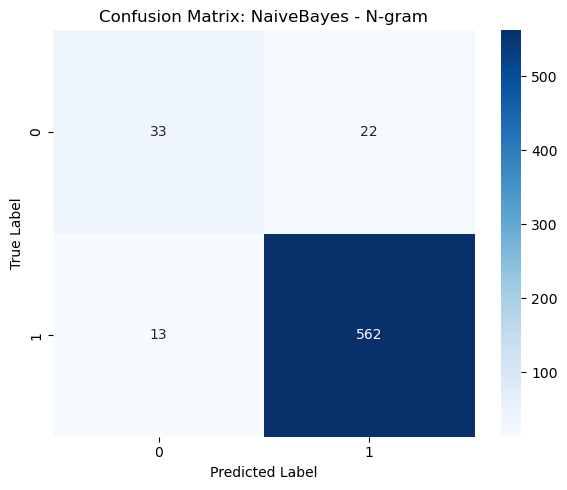


💾 Best model and vectorizer saved!

Positive 😊
Negative 😡


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import joblib

# -------------------------------------
# LOAD DATA
# -------------------------------------
data = pd.read_csv("amazon_alexa.tsv", sep="\t")

data = data.dropna(subset=['verified_reviews', 'feedback'])

# -------------------------------------
# CLEANING FUNCTION
# -------------------------------------
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words]
    text = [ps.stem(word) for word in text]
    return ' '.join(text)

data['final_cleaned_text'] = data['verified_reviews'].apply(clean_text)

# -------------------------------------
# VECTORIZE
# -------------------------------------
X = data['final_cleaned_text']
y = data['feedback']

# 3 vectorizers
cv = CountVectorizer()
tfidf = TfidfVectorizer()
ngram = CountVectorizer(ngram_range=(1, 2))

df_BOW = cv.fit_transform(X)
df_tfidf = tfidf.fit_transform(X)
df_ngram = ngram.fit_transform(X)

vectorized_datasets = [
    ("BoW", df_BOW, cv),
    ("TF-IDF", df_tfidf, tfidf),
    ("N-gram", df_ngram, ngram)
]

# -------------------------------------
# TRAIN MODELS
# -------------------------------------
results = []

for name, X_vec, vec_model in vectorized_datasets:
    X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=100)

    # Random Forest
    rf = RandomForestClassifier(random_state=100)
    rf.fit(X_train, y_train)
    preds_rf = rf.predict(X_test)
    rf_f1 = f1_score(y_test, preds_rf, average='macro')
    results.append((f"RandomForest - {name}", rf_f1, rf, X_test, y_test, preds_rf, vec_model))

    # Naive Bayes
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    preds_nb = nb.predict(X_test)
    nb_f1 = f1_score(y_test, preds_nb, average='macro')
    results.append((f"NaiveBayes - {name}", nb_f1, nb, X_test, y_test, preds_nb, vec_model))

# -------------------------------------
# GET BEST MODEL (IMPORTANT FIX)
# -------------------------------------
best_model_label, best_f1, best_model, X_test_best, y_test_best, y_pred_best, best_vectorizer = max(
    results, key=lambda x: x[1]
)

print(f"\n✅ Best Model: {best_model_label} (Macro F1 = {best_f1:.4f})\n")
print(classification_report(y_test_best, y_pred_best))


# -------------------------------------
# CONFUSION MATRIX
# -------------------------------------
cm = confusion_matrix(y_test_best, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix: {best_model_label}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# -------------------------------------
# SAVE BEST MODEL + VECTORIZER
# -------------------------------------
joblib.dump(best_model, "best_sentiment_model.pkl")
joblib.dump(best_vectorizer, "vectorizer.pkl")

print("\n💾 Best model and vectorizer saved!\n")

# -------------------------------------
# PREDICTION FUNCTION
# -------------------------------------
def predict_review(text):
    cleaned = clean_text(text)
    vectorizer = joblib.load("vectorizer.pkl")
    final_model = joblib.load("best_sentiment_model.pkl")
    vec = vectorizer.transform([cleaned])
    pred = final_model.predict(vec)[0]
    return "Positive 😊" if pred == 1 else "Negative 😡"

# TEST
print(predict_review("I love this Alexa product, amazing quality!"))
print(predict_review("Stopped working after a week, worst experience."))

In [24]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np


sentences = data['final_cleaned_text'].apply(lambda x: x.split())  

# Step 2 — Train CBOW Model (sg=0)
cbow_model = Word2Vec(
    sentences,
    vector_size=100,  # length of each word vector
    window=3,         # context window size
    min_count=5,      # include all words
    sg=0,             # CBOW
    workers=4         # CPU cores to use
)

# Step 3 — Train Skip-gram Model (sg=1)
skipgram_model = Word2Vec(
    sentences,
    vector_size=100,
    window=3,
    min_count=5,
    sg=1,             # Skip-gram
    workers=4
)

# Step 4 — Function to get sentence vectors
def get_sentence_vector(model, tokens):
    word_vecs = [model.wv[word] for word in tokens if word in model.wv]
    if len(word_vecs) == 0:
        return np.zeros(model.vector_size)  # handle empty sentences
    return np.mean(word_vecs, axis=0)

# Step 5 — Apply to dataset

# CBOW Vectors
data_cbow_vectors = np.array([get_sentence_vector(cbow_model, tokens) for tokens in sentences])
# Skip-gram Vectors
data_skipgram_vectors = np.array([get_sentence_vector(skipgram_model, tokens) for tokens in sentences])

# Step 6 — Convert to DataFrames (optional)
df_cbow = pd.DataFrame(data_cbow_vectors)
df_skipgram = pd.DataFrame(data_skipgram_vectors)


In [27]:
similar = cbow_model.wv.similar_by_word('sound', topn=5)
print(similar)

[('great', 0.9991469979286194), ('disappoint', 0.9990905523300171), ('also', 0.998992919921875), ('good', 0.9989781379699707), ('without', 0.9989661574363708)]


In [26]:
import numpy as np

# Make sure this matches your file name exactly
filename = 'glove.6B.100d.txt' 

embeddings_index = {}

print("⏳ Loading GloVe vectors...")

with open(filename, encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        try:
            # Convert the rest of the line to a numpy array
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        except ValueError:
            # Keeps the code safe if a line is corrupted
            continue

print(f"✅ Loaded {len(embeddings_index)} word vectors.")

# --- Test it out ---
word = "sound"
if word in embeddings_index:
    print(f"\nVector for '{word}':")
    print(embeddings_index[word][:10]) # Printing just the first 10 numbers
else:
    print(f"Word '{word}' not found.")

⏳ Loading GloVe vectors...
✅ Loaded 400000 word vectors.

Vector for 'sound':
[-0.31154   0.028206  0.79365  -0.45298   0.45264  -0.098082  0.015137
 -0.42804  -0.31728   0.23111 ]


In [29]:
def average_vectorizer_GloVe(doc):
    feature_vector = np.zeros((100,), dtype="float64") # 100d vectors
    words = str(doc).split()
    count = 0
    
    for word in words:
        if word in embeddings_index:
            feature_vector += embeddings_index[word]
            count += 1

    if count > 0:
        feature_vector /= count
        
    return feature_vector

# 2. Apply it to your text column
# (Replace 'data' with your actual dataframe name if different)
print("⏳ Converting text to numbers...")
vectors = data['final_cleaned_text'].apply(average_vectorizer_GloVe).tolist()

# 3. Create the DataFrame with "Feature X" column names
df_glove = pd.DataFrame(vectors, columns=['Feature ' + str(i) for i in range(100)])

# 4. Show the result
print(df_glove.head())

⏳ Converting text to numbers...
   Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0  -0.027210   0.555940   0.550005  -0.133120   0.280835   0.456473   
1   0.259750   0.558330   0.579860  -0.213610   0.130840   0.943850   
2  -0.012019   0.142245   0.626265  -0.403028  -0.298001   0.258451   
3  -0.115032   0.246546   0.448086  -0.396120  -0.205437   0.268478   
4   0.127050   0.372530   0.230760  -0.107270   1.427300   0.779900   

   Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 90  Feature 91  \
0  -0.273995  -0.003225  -0.069488  -0.310150  ...   -0.258275    0.133759   
1  -0.428170  -0.374200  -0.094499  -0.433440  ...   -0.470990   -0.057492   
2  -0.012217   0.052620   0.068648  -0.180106  ...   -0.139421    0.061935   
3   0.041235   0.013569  -0.254561  -0.052050  ...   -0.042887   -0.111249   
4  -0.055009  -0.189090  -0.428280   0.284430  ...   -0.026262   -0.085846   

   Feature 92  Feature 93  Feature 94  Feature 95  Feature 96  Feature 9

⏳ Running t-SNE (this might take a moment)...


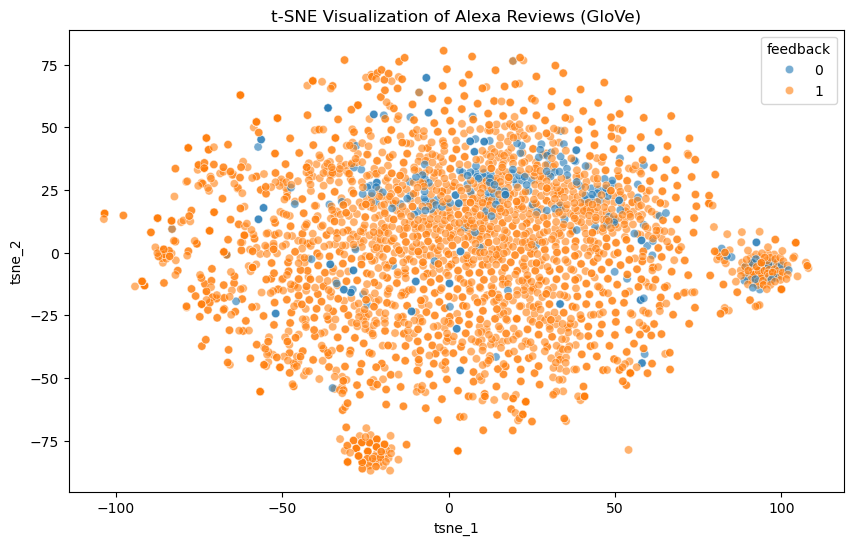

In [30]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Reduce 100 dimensions to 2 dimensions
print("⏳ Running t-SNE (this might take a moment)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, init='pca', learning_rate='auto')
tsne_results = tsne.fit_transform(df_glove)

# 2. Add results to your dataframe for plotting
data['tsne_1'] = tsne_results[:, 0]
data['tsne_2'] = tsne_results[:, 1]

# 3. Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='tsne_1', y='tsne_2',
    hue=data['feedback'],  # Color by positive/negative feedback if you have this column
    data=data,
    alpha=0.6
)
plt.title('t-SNE Visualization of Alexa Reviews (GloVe)')
plt.show()

In [31]:
from gensim.models import Word2Vec

# 1. Prepare sentences (Tokenization)
# The model needs a list of lists: [['love', 'my', 'echo'], ['bad', 'sound']]
sentences = [str(row).split() for row in data['final_cleaned_text']]

# 2. Train the Model
print("⏳ Training Custom Word2Vec on Alexa data...")
w2v_model = Word2Vec(
    sentences,
    vector_size=100,  # Same size as GloVe for fair comparison
    window=5,         # Context window
    min_count=2,      # Ignore words that appear less than twice
    workers=4
)

print("✅ Training Complete!")

# 3. Test the "Alexa Context"
# In generic English, 'dot' is a shape. In your data, it should be close to 'echo' or 'device'.
word = "sound"
if word in w2v_model.wv:
    print(f"\nMost similar to '{word}' in Alexa context:")
    print(w2v_model.wv.most_similar(word))
else:
    print(f"Word '{word}' not found in dataset.")

⏳ Training Custom Word2Vec on Alexa data...
✅ Training Complete!

Most similar to 'sound' in Alexa context:
[('speaker', 0.999479353427887), ('screen', 0.9994745254516602), ('good', 0.9994722008705139), ('great', 0.9994542002677917), ('expect', 0.9994403719902039), ('need', 0.999412477016449), ('product', 0.9994013905525208), ('small', 0.9993953704833984), ('size', 0.9993944764137268), ('ring', 0.9993792772293091)]


In [81]:
# ==========================================
# 🚀 OBJECTIVE: Alexa Sentiment Prediction (Optimized)
# Model: all-MiniLM-L6-v2 + Logistic Regression (Balanced)
# ==========================================

# --- 1. Install & Import Libraries ---
# !pip install -U sentence-transformers scikit-learn pandas numpy torch -q

import pandas as pd
import numpy as np
import torch
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# --- 2. Load Your Data ---
# Make sure your dataframe is named 'data'
if 'data' not in locals():
    # Uncomment this line if you need to load your CSV file:
    # data = pd.read_csv('alexa_reviews.csv')
    print("⚠️ Please ensure your dataframe is loaded as 'data'")
else:
    print(f"✅ Data loaded. Shape: {data.shape}")

    # --- 3. Load the Transformer Model ---
    # Uses GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"⏳ Loading 'all-MiniLM-L6-v2' model on {device}...")
    
    model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', device=device)

    # --- 4. Generate Embeddings ---
    # Convert text to numbers
    print("⏳ Vectorizing reviews (this takes a moment)...")
    embedding_matrix = model.encode(
        data['final_cleaned_text'].tolist(), 
        show_progress_bar=True, 
        device=device
    )
    
    print(f"✅ Embeddings ready! Shape: {embedding_matrix.shape}")

    # --- 5. Train the Classifier (The Fix) ---
    X = embedding_matrix
    y = data['feedback']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # CRITICAL FIX: class_weight='balanced' 
    # This tells the model to pay extra attention to the Negative reviews (0)
    print("⏳ Training classifier with BALANCED weights...")
    clf = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
    clf.fit(X_train, y_train)

    # --- 6. Evaluate ---
    y_pred = clf.predict(X_test)

    print("\n" + "="*30)
    print(f"🎉 FINAL RESULTS")
    print("="*30)
    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.2%}")
    print("\nDetailed Report (Check Recall for Class 0):")
    print(classification_report(y_test, y_pred))

    # --- 7. Live Test ---
    print("\n🤖 Live Testing:")
    test_reviews = [
        "The sound quality is terrible and it never connects.",
        "I absolutely love this device, it changed my life!",
        "It is okay, but the battery life could be better."
    ]

    test_vectors = model.encode(test_reviews)
    predictions = clf.predict(test_vectors)

    for review, pred in zip(test_reviews, predictions):
        sentiment = "Positive (1)" if pred == 1 else "Negative (0)"
        print(f"📝 '{review}' -> {sentiment}")

✅ Data loaded. Shape: (3149, 10)
⏳ Loading 'all-MiniLM-L6-v2' model on cpu...
⏳ Vectorizing reviews (this takes a moment)...


Batches:   0%|          | 0/99 [00:00<?, ?it/s]

✅ Embeddings ready! Shape: (3149, 384)
⏳ Training classifier with BALANCED weights...

🎉 FINAL RESULTS
✅ Accuracy: 82.38%

Detailed Report (Check Recall for Class 0):
              precision    recall  f1-score   support

           0       0.34      0.83      0.48        63
           1       0.98      0.82      0.89       567

    accuracy                           0.82       630
   macro avg       0.66      0.82      0.69       630
weighted avg       0.91      0.82      0.85       630


🤖 Live Testing:
📝 'The sound quality is terrible and it never connects.' -> Negative (0)
📝 'I absolutely love this device, it changed my life!' -> Positive (1)
📝 'It is okay, but the battery life could be better.' -> Positive (1)


In [83]:
from sentence_transformers import SentenceTransformer
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib

# -----------------------------
# 1️⃣ Load true star ratings (1–5)
# -----------------------------
y = data["rating"].astype(float)       # keep original stars
X_text = data["verified_reviews"].tolist()

# -----------------------------
# 2️⃣ Load strong embedding model
# -----------------------------
model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")
X = model.encode(X_text, show_progress_bar=True)

# -----------------------------
# 3️⃣ Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 4️⃣ Regression Model (SVR)
# -----------------------------
reg = SVR(kernel='rbf', C=3.0, gamma='scale')
reg.fit(X_train, y_train)

# -----------------------------
# 5️⃣ Predict and round to stars
# -----------------------------
pred_cont = reg.predict(X_test)

# round to nearest integer 1–5
pred_stars = np.clip(np.round(pred_cont), 1, 5)

print("MSE:", mean_squared_error(y_test, pred_cont))
print("\nSample Predictions (first 20):")
print(list(zip(y_test[:20], pred_stars[:20])))

# -----------------------------
# 6️⃣ Live Test
# -----------------------------
test_reviews = [
    "The sound is horrible and it disconnects constantly.",
    "It's okay, not great but does the job for the price.",
    "Best purchase ever! I love it so much."
]

test_vecs = model.encode(test_reviews)
pred_scores = reg.predict(test_vecs)
pred_stars_live = np.clip(np.round(pred_scores), 1, 5)

for r, p in zip(test_reviews, pred_stars_live):
    print(r, "->", int(p), "stars")

# -----------------------------
# 7️⃣ Save model
# -----------------------------
joblib.dump(reg, "alexa_star_regressor.pkl")

Batches:   0%|          | 0/99 [00:00<?, ?it/s]

MSE: 0.4964895149169372

Sample Predictions (first 20):
[(5.0, 5.0), (5.0, 5.0), (1.0, 4.0), (5.0, 5.0), (5.0, 5.0), (5.0, 5.0), (5.0, 5.0), (2.0, 3.0), (5.0, 5.0), (5.0, 5.0), (5.0, 4.0), (5.0, 5.0), (1.0, 3.0), (2.0, 4.0), (5.0, 5.0), (1.0, 3.0), (4.0, 4.0), (5.0, 5.0), (5.0, 5.0), (5.0, 5.0)]
The sound is horrible and it disconnects constantly. -> 2 stars
It's okay, not great but does the job for the price. -> 4 stars
Best purchase ever! I love it so much. -> 5 stars


['alexa_star_regressor.pkl']

In [44]:
!pip install --upgrade --force-reinstall numpy==1.26.4

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires protobuf<5,>=4.25.3, but you have protobuf 6.32.1 which is incompatible.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.32.1 which is incompatible.


In [45]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.28  --force-reinstall --upgrade --no-cache-dir -q 2>/dev/null

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [46]:
!pip install tiktoken pypdf langchain langchain-community chromadb sentence-transformers huggingface_hub

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [33]:
from huggingface_hub import hf_hub_download
from langchain_community.llms import LlamaCpp
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

print("⏳ Downloading Mistral-7B GGUF (This is optimized for your machine)...")

# 1. Download the model file (approx. 5GB, but runs very fast)
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q4_K_M.gguf" # Q4 is faster & uses less RAM than Q6

model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

print(f"✅ Model downloaded to: {model_path}")

# 2. Load it into LangChain
# n_ctx=2048 allows it to read long reviews without crashing
llm = LlamaCpp(
    model_path=model_path,
    n_ctx=2048,     
    temperature=0.3,
    max_tokens=512,
    top_p=1,
    callback_manager=CallbackManager([StreamingStdOutCallbackHandler()]),
    verbose=True # Set to False to stop the technical logs
)

print("✅ Mistral-7B Loaded Successfully!")

⏳ Downloading Mistral-7B GGUF (This is optimized for your machine)...
✅ Model downloaded to: /Users/mayankkumar/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q4_K_M.gguf


llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /Users/mayankkumar/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q4_K_M.gguf (version unknown)
llama_model_loader: - tensor    0:                token_embd.weight q4_K     [  4096, 32000,     1,     1 ]
llama_model_loader: - tensor    1:              blk.0.attn_q.weight q4_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    2:              blk.0.attn_k.weight q4_K     [  4096,  1024,     1,     1 ]
llama_model_loader: - tensor    3:              blk.0.attn_v.weight q6_K     [  4096,  1024,     1,     1 ]
llama_model_loader: - tensor    4:         blk.0.attn_output.weight q4_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    5:            blk.0.ffn_gate.weight q4_K     [  4096, 14336,     1,     1 ]
llama_model_loader: - tensor    6:              blk.0.ffn_up.weight q4_K  

✅ Mistral-7B Loaded Successfully!


...............................................................................................
llama_new_context_with_model: kv self size  =  256.00 MB
llama_new_context_with_model: compute buffer total size =  153.47 MB
AVX = 0 | AVX2 = 0 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 0 | NEON = 1 | ARM_FMA = 1 | F16C = 0 | FP16_VA = 1 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 0 | SSSE3 = 0 | VSX = 0 | 


In [34]:
from langchain_community.document_loaders import DataFrameLoader

if 'data' not in locals():
    data = pd.read_csv('alexa_reviews.csv')

loader = DataFrameLoader(data, page_content_column="final_cleaned_text")
alexa_docs = loader.load()

In [35]:
from langchain.text_splitter import RecursiveCharacterTextSplitter


text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=512,
    chunk_overlap=50
)

document_chunks = text_splitter.split_documents(alexa_docs)
print(f"Total Chunks: {len(document_chunks)}")

Total Chunks: 3085


In [36]:
document_chunks[0]

Document(page_content='love echo', metadata={'rating': 5, 'date': '31-Jul-18', 'variation': 'Charcoal Fabric ', 'verified_reviews': 'Love my Echo!', 'feedback': 1, 'tsne_1': 23.183624267578125, 'tsne_2': -59.53324508666992})

In [62]:
from langchain_community.embeddings import SentenceTransformerEmbeddings
embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

In [63]:
import os
out_dir = "alexa_db"

if not os.path.exists(out_dir):
  os.makedirs(out_dir)

In [65]:
from langchain_community.vectorstores import Chroma
vectorstore = Chroma.from_documents(
    documents=document_chunks,
    embedding=embedding_model,
    persist_directory="alexa_db"
)

Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


In [66]:
vectorstore.embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False})
  (2): Normalize()
), model_name='all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False)

In [67]:
retriever = vectorstore.as_retriever(
    search_type='similarity',
    search_kwargs={'k': 3}
)

In [68]:
def generate_rag_response(user_input):
    # 1. RETRIEVAL
    relevant_docs = retriever.get_relevant_documents(user_input)
    context_text = "\n\n".join([doc.page_content for doc in relevant_docs])
    
    # Safety Cutoff (Mistral can handle more, but let's be safe)
    if len(context_text) > 1500:
        context_text = context_text[:1500]

    # 2. PROMPT (Mistral Format)
    # Mistral uses [INST] tags to understand instructions
    prompt = f"""[INST] You are an Alexa Product Analyst. Use the customer reviews below to answer the user's question.
    
    Reviews:
    {context_text}
    
    Question: {user_input}
    
    Write a helpful summary answer: [/INST]
    """
    
    # 3. GENERATE
    try:
        response = llm.invoke(prompt)
        return response
    except Exception as e:
        return f"Error: {str(e)}"

# --- TEST IT ---
print("\nTesting Mistral...\n")
print(generate_rag_response("What are the main complaints about battery life?"))

Failed to send telemetry event CollectionQueryEvent: capture() takes 1 positional argument but 3 were given



Testing Mistral...

Based on the customer reviews provided, there is no mention of specific issues related to battery life. The reviews focus mostly on the difficulty in setting up the product directly and using the app, which was described as slow. However, none of the reviewers mentioned battery life as a concern or complaint.Based on the customer reviews provided, there is no mention of specific issues related to battery life. The reviews focus mostly on the difficulty in setting up the product directly and using the app, which was described as slow. However, none of the reviewers mentioned battery life as a concern or complaint.



llama_print_timings:        load time =  3450.21 ms
llama_print_timings:      sample time =    45.93 ms /    60 runs   (    0.77 ms per token,  1306.28 tokens per second)
llama_print_timings: prompt eval time = 20587.85 ms /   234 tokens (   87.98 ms per token,    11.37 tokens per second)
llama_print_timings:        eval time =  6521.99 ms /    59 runs   (  110.54 ms per token,     9.05 tokens per second)
llama_print_timings:       total time = 27299.70 ms


In [69]:
print(generate_rag_response("What are the main complaints about battery life?"))
print("-" * 30)
print(generate_rag_response("Do users like the sound quality?"))

Based

Llama.generate: prefix-match hit


 on the customer reviews provided, there is no mention of specific complaints regarding battery life. The reviews focus mostly on the difficulty in setting up the device directly and using the app, which was described as slow. Some customers also mentioned forgetting certain steps during setup and finding the process time-consuming. However, none of the reviews indicated any issues with battery life.Based on the customer reviews provided, there is no mention of specific complaints regarding battery life. The reviews focus mostly on the difficulty in setting up the device directly and using the app, which was described as slow. Some customers also mentioned forgetting certain steps during setup and finding the process time-consuming. However, none of the reviews indicated any issues with battery life.
------------------------------



llama_print_timings:        load time =  3450.21 ms
llama_print_timings:      sample time =    52.88 ms /    75 runs   (    0.71 ms per token,  1418.36 tokens per second)
llama_print_timings: prompt eval time =     0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =  8374.12 ms /    75 runs   (  111.65 ms per token,     8.96 tokens per second)
llama_print_timings:       total time =  8555.35 ms
Llama.generate: prefix-match hit


Based on the customer reviews provided, a significant number of users have expressed their satisfaction with the speaker's sound quality. The repetition of the phrase "really good" suggests that the sound quality is a notable strength for this product.Based on the customer reviews provided, a significant number of users have expressed their satisfaction with the speaker's sound quality. The repetition of the phrase "really good" suggests that the sound quality is a notable strength for this product.



llama_print_timings:        load time =  3450.21 ms
llama_print_timings:      sample time =    36.41 ms /    49 runs   (    0.74 ms per token,  1345.75 tokens per second)
llama_print_timings: prompt eval time =  4171.51 ms /    53 tokens (   78.71 ms per token,    12.71 tokens per second)
llama_print_timings:        eval time =  5424.94 ms /    48 runs   (  113.02 ms per token,     8.85 tokens per second)
llama_print_timings:       total time =  9726.05 ms


In [76]:
# Query 1: Specific Feature Complaint
query1 = "What are the most common complaints about WIFI connectivity?"
print(f"❓ Q: {query1}")
print(f"💡 A: {generate_rag_response(query1)}\n")

# Query 2: Positive Sentiment
query2 = "What do customers love most about the speaker quality?"
print(f"❓ Q: {query2}")
print(f"💡 A: {generate_rag_response(query2)}\n")

# Query 3: Setup Issues
query3 = "Is the setup process difficult for new users?"
print(f"❓ Q: {query3}")
print(f"💡 A: {generate_rag_response(query3)}\n")

❓ Q: What are the most common complaints about WIFI connectivity?


Llama.generate: prefix-match hit


1. Users have reported issues with finding and connecting to Wi-Fi networks with their One Move devices.
    2. Some users have mentioned receiving error messages related to Wi-Fi connectivity troubles.
    3. The process of troubleshooting Wi-Fi connectivity issues has taken a significant amount of time for some users.💡 A: 1. Users have reported issues with finding and connecting to Wi-Fi networks with their One Move devices.
    2. Some users have mentioned receiving error messages related to Wi-Fi connectivity troubles.
    3. The process of troubleshooting Wi-Fi connectivity issues has taken a significant amount of time for some users.

❓ Q: What do customers love most about the speaker quality?



llama_print_timings:        load time =  3450.21 ms
llama_print_timings:      sample time =    53.70 ms /    70 runs   (    0.77 ms per token,  1303.64 tokens per second)
llama_print_timings: prompt eval time = 13190.59 ms /   176 tokens (   74.95 ms per token,    13.34 tokens per second)
llama_print_timings:        eval time =  7553.08 ms /    70 runs   (  107.90 ms per token,     9.27 tokens per second)
llama_print_timings:       total time = 20959.21 ms
Llama.generate: prefix-match hit


1. The speaker sound is really good according to multiple reviews.
    2. This suggests that the speaker produces clear and high-quality audio.
    3. Customers have expressed their satisfaction with the speaker's sound repeatedly.💡 A: 1. The speaker sound is really good according to multiple reviews.
    2. This suggests that the speaker produces clear and high-quality audio.
    3. Customers have expressed their satisfaction with the speaker's sound repeatedly.

❓ Q: Is the setup process difficult for new users?



llama_print_timings:        load time =  3450.21 ms
llama_print_timings:      sample time =    39.23 ms /    49 runs   (    0.80 ms per token,  1248.88 tokens per second)
llama_print_timings: prompt eval time =  3614.71 ms /    48 tokens (   75.31 ms per token,    13.28 tokens per second)
llama_print_timings:        eval time =  5034.56 ms /    49 runs   (  102.75 ms per token,     9.73 tokens per second)
llama_print_timings:       total time =  8788.68 ms
Llama.generate: prefix-match hit


1. The setup is described as "easier" and "fairly easy" by multiple reviewers.
    2. Some users mentioned that loading stuff, text messaging friends, linking email, and accessing common social media was easier without the need to download anything.
    3. Tech support was described as helpful and accessible through a direct phone number.💡 A: 1. The setup is described as "easier" and "fairly easy" by multiple reviewers.
    2. Some users mentioned that loading stuff, text messaging friends, linking email, and accessing common social media was easier without the need to download anything.
    3. Tech support was described as helpful and accessible through a direct phone number.




llama_print_timings:        load time =  3450.21 ms
llama_print_timings:      sample time =    63.60 ms /    78 runs   (    0.82 ms per token,  1226.43 tokens per second)
llama_print_timings: prompt eval time = 17874.84 ms /   229 tokens (   78.06 ms per token,    12.81 tokens per second)
llama_print_timings:        eval time =  8228.57 ms /    77 runs   (  106.86 ms per token,     9.36 tokens per second)
llama_print_timings:       total time = 26356.41 ms


In [77]:
# ==========================================
# 🧪 AUTOMATED QUESTION TESTER
# ==========================================

# List of questions to test different abilities of your RAG system
test_questions = [
    # 1. Feature Specifics
    "How is the battery life on this device?",
    "Does it connect easily to WiFi?",
    
    # 2. User Sentiment (Opinions)
    "Do customers think the sound quality is good for music?",
    "What do people say about the price?",
    
    # 3. Troubleshooting / Complaints
    "What are the most common complaints?",
    "Is the setup process difficult?",
    
    # 4. Specific Capabilities
    "Can this device play audiobooks?",
    "Does it work with smart home lights?",
    
    # 5. The 'Hallucination' Test (Should say "I don't know")
    "Can this Alexa device make me a sandwich?" 
]

print(f"🚀 Running {len(test_questions)} Test Questions...\n")

for i, question in enumerate(test_questions):
    print(f"🔹 Test {i+1}: {question}")
    
    # Ask the model
    answer = generate_rag_response(question)
    
    # Print the result
    print(f"💡 Answer: {answer}")
    print("-" * 60)

🚀 Running 9 Test Questions...

🔹 Test 1: How is the battery life on this device?


Llama.generate: prefix-match hit


1. The reviews do not mention anything about battery life.
    2. Therefore, we cannot determine if the battery life is good or bad based on these reviews alone.
    3. To answer the user's question, more information would be needed from the product specifications or additional reviews.💡 Answer: 1. The reviews do not mention anything about battery life.
    2. Therefore, we cannot determine if the battery life is good or bad based on these reviews alone.
    3. To answer the user's question, more information would be needed from the product specifications or additional reviews.
------------------------------------------------------------
🔹 Test 2: Does it connect easily to WiFi?



llama_print_timings:        load time =  3450.21 ms
llama_print_timings:      sample time =    51.57 ms /    62 runs   (    0.83 ms per token,  1202.23 tokens per second)
llama_print_timings: prompt eval time =  3410.56 ms /    43 tokens (   79.32 ms per token,    12.61 tokens per second)
llama_print_timings:        eval time =  6447.17 ms /    61 runs   (  105.69 ms per token,     9.46 tokens per second)
llama_print_timings:       total time = 10036.86 ms
Llama.generate: prefix-match hit


1. Users mention they purchased the Echo Smart Speaker and love playing music on it.
    2. They express frustration with initial troubles connecting to WiFi being a problem.
    3. The issue of WiFi connection seems to be a common occurrence for multiple users.💡 Answer: 1. Users mention they purchased the Echo Smart Speaker and love playing music on it.
    2. They express frustration with initial troubles connecting to WiFi being a problem.
    3. The issue of WiFi connection seems to be a common occurrence for multiple users.
------------------------------------------------------------
🔹 Test 3: Do customers think the sound quality is good for music?



llama_print_timings:        load time =  3450.21 ms
llama_print_timings:      sample time =    49.50 ms /    59 runs   (    0.84 ms per token,  1191.97 tokens per second)
llama_print_timings: prompt eval time =  8124.86 ms /   102 tokens (   79.66 ms per token,    12.55 tokens per second)
llama_print_timings:        eval time =  6166.21 ms /    58 runs   (  106.31 ms per token,     9.41 tokens per second)
llama_print_timings:       total time = 14473.86 ms
Llama.generate: prefix-match hit


1. Customers have bought music, suggesting they use Alexa for music playback.
    2. They express that the sound quality is pretty good.
    3. There are multiple reviews stating the same sentiment, indicating a consensus among customers.💡 Answer: 1. Customers have bought music, suggesting they use Alexa for music playback.
    2. They express that the sound quality is pretty good.
    3. There are multiple reviews stating the same sentiment, indicating a consensus among customers.
------------------------------------------------------------
🔹 Test 4: What do people say about the price?



llama_print_timings:        load time =  3450.21 ms
llama_print_timings:      sample time =    44.60 ms /    52 runs   (    0.86 ms per token,  1165.95 tokens per second)
llama_print_timings: prompt eval time =  4567.89 ms /    56 tokens (   81.57 ms per token,    12.26 tokens per second)
llama_print_timings:        eval time =  5600.05 ms /    52 runs   (  107.69 ms per token,     9.29 tokens per second)
llama_print_timings:       total time = 10326.05 ms
Llama.generate: prefix-match hit


1. The price is mentioned positively in every review.
    2. People find the price to be perfect for the product.
    3. No negative comments have been made regarding the price.💡 Answer: 1. The price is mentioned positively in every review.
    2. People find the price to be perfect for the product.
    3. No negative comments have been made regarding the price.
------------------------------------------------------------
🔹 Test 5: What are the most common complaints?



llama_print_timings:        load time =  3450.21 ms
llama_print_timings:      sample time =    36.18 ms /    42 runs   (    0.86 ms per token,  1160.86 tokens per second)
llama_print_timings: prompt eval time =  3265.65 ms /    39 tokens (   83.73 ms per token,    11.94 tokens per second)
llama_print_timings:        eval time =  4403.89 ms /    41 runs   (  107.41 ms per token,     9.31 tokens per second)
llama_print_timings:       total time =  7795.37 ms
Llama.generate: prefix-match hit


1. The most common complaint is "perform new." This suggests that users are experiencing issues with Alexa not understanding or executing new commands.
    2. There are multiple reviews mentioning this issue, indicating it's a widespread problem.
    3. No specific details are given about the nature of the "new" commands or what exactly is causing the issue, but it seems to be a significant pain point for some users.💡 Answer: 1. The most common complaint is "perform new." This suggests that users are experiencing issues with Alexa not understanding or executing new commands.
    2. There are multiple reviews mentioning this issue, indicating it's a widespread problem.
    3. No specific details are given about the nature of the "new" commands or what exactly is causing the issue, but it seems to be a significant pain point for some users.
------------------------------------------------------------
🔹 Test 6: Is the setup process difficult?



llama_print_timings:        load time =  3450.21 ms
llama_print_timings:      sample time =    77.95 ms /    90 runs   (    0.87 ms per token,  1154.62 tokens per second)
llama_print_timings: prompt eval time =  3142.85 ms /    38 tokens (   82.71 ms per token,    12.09 tokens per second)
llama_print_timings:        eval time =  9503.15 ms /    89 runs   (  106.78 ms per token,     9.37 tokens per second)
llama_print_timings:       total time = 12911.36 ms
Llama.generate: prefix-match hit


1. Easiest setup process
    2. Fast setup process
    3. No difficulty reported in setting up.💡 Answer: 1. Easiest setup process
    2. Fast setup process
    3. No difficulty reported in setting up.
------------------------------------------------------------
🔹 Test 7: Can this device play audiobooks?



llama_print_timings:        load time =  3450.21 ms
llama_print_timings:      sample time =    22.23 ms /    26 runs   (    0.85 ms per token,  1169.75 tokens per second)
llama_print_timings: prompt eval time =  3228.49 ms /    40 tokens (   80.71 ms per token,    12.39 tokens per second)
llama_print_timings:        eval time =  2602.70 ms /    25 runs   (  104.11 ms per token,     9.61 tokens per second)
llama_print_timings:       total time =  5910.28 ms
Llama.generate: prefix-match hit


1. The reviews mention "play music request" multiple times, indicating that users are successfully playing music on the device. However, there is no mention of audiobooks in these reviews.
    2. The question asks specifically about audiobooks, which suggests that the user may have already determined that the device can play music.
    3. Alexa, the device's virtual assistant, has the capability to play audiobooks through Audible or other compatible sources. Therefore, it is safe to assume that the device can play audiobooks, even if the reviews do not mention it directly.💡 Answer: 1. The reviews mention "play music request" multiple times, indicating that users are successfully playing music on the device. However, there is no mention of audiobooks in these reviews.
    2. The question asks specifically about audiobooks, which suggests that the user may have already determined that the device can play music.
    3. Alexa, the device's virtual assistant, has the capability to play audi


llama_print_timings:        load time =  3450.21 ms
llama_print_timings:      sample time =   115.85 ms /   132 runs   (    0.88 ms per token,  1139.39 tokens per second)
llama_print_timings: prompt eval time =  3205.16 ms /    38 tokens (   84.35 ms per token,    11.86 tokens per second)
llama_print_timings:        eval time = 14113.85 ms /   131 runs   (  107.74 ms per token,     9.28 tokens per second)
llama_print_timings:       total time = 17713.71 ms
Llama.generate: prefix-match hit


1. The user mentions purchasing a "smart light lamp" multiple times in their reviews, indicating that the product they are using is indeed a smart home light.
    2. They also mention turning on/off the light using the term "live room room," which could be interpreted as voice commands being used to control the light. This further supports the idea that this is a smart home device.
    3. The phrase "great bundl fun music game" suggests that there may be additional features or integrations with other smart devices, such as speakers for playing music in sync with the lights. However, this point is not directly related to the question but could provide additional context for users considering a similar product.💡 Answer: 1. The user mentions purchasing a "smart light lamp" multiple times in their reviews, indicating that the product they are using is indeed a smart home light.
    2. They also mention turning on/off the light using the term "live room room," which could be interpreted as 


llama_print_timings:        load time =  3450.21 ms
llama_print_timings:      sample time =   129.85 ms /   147 runs   (    0.88 ms per token,  1132.07 tokens per second)
llama_print_timings: prompt eval time =  7646.56 ms /    92 tokens (   83.11 ms per token,    12.03 tokens per second)
llama_print_timings:        eval time = 16294.71 ms /   146 runs   (  111.61 ms per token,     8.96 tokens per second)
llama_print_timings:       total time = 24395.98 ms
Llama.generate: prefix-match hit


1. The reviews do not mention anything about the Alexa device making sandwiches.
    2. They all refer to asking Alexa questions or playing music through a speaker.
    3. No specific model of Alexa device is mentioned in the reviews.💡 Answer: 1. The reviews do not mention anything about the Alexa device making sandwiches.
    2. They all refer to asking Alexa questions or playing music through a speaker.
    3. No specific model of Alexa device is mentioned in the reviews.
------------------------------------------------------------



llama_print_timings:        load time =  3450.21 ms
llama_print_timings:      sample time =    47.90 ms /    55 runs   (    0.87 ms per token,  1148.35 tokens per second)
llama_print_timings: prompt eval time =  4206.94 ms /    50 tokens (   84.14 ms per token,    11.89 tokens per second)
llama_print_timings:        eval time =  6046.06 ms /    54 runs   (  111.96 ms per token,     8.93 tokens per second)
llama_print_timings:       total time = 10421.88 ms
